$$
Q_1/(\lambda \kappa)
=   \left|\frac{ { 4}/{\sqrt{3} 
}}{
\sum_{k=1}^2 
k
\,
d^{(2)}_{k,0}(\theta_M)
\displaystyle \frac{r_{2,k}'(\alpha,\beta) }{3 \zeta_q}}\right|.
$$
where
$$|r'_{2,k}(\alpha,\beta) |^2 = R'_{2,k} R^{\prime *}_{2,k}$$
and
$$R'_{2,k}
= 
e^{-i k \gamma}
\sum_{n=-2}^2 
e^{-i n \alpha} d_{n,k}^{(2)}(\beta) 
\,
\rho_{2,n},
$$
and
$$\rho_{2,0}=  \sqrt{\frac{3}{2}}~\zeta_q, ~~~~
\rho_{2,\pm 1} = 0, ~~~~
\rho_{2,\pm 2} = - \eta_q \zeta_q/2.
$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import spinOps
from matplotlib import cm
from matplotlib.cm import ScalarMappable

In [7]:
# Define the range of alpha and beta values
alpha_values = np.linspace(0,2*np.pi, 200)  
beta_values = np.linspace(-np.pi/2, np.pi/2, 100)  # Range of latitudes

# Create a grid of alpha and beta values
alpha_grid, beta_grid = np.meshgrid(alpha_values, beta_values)

# Define a list of eta values
eta_values = np.arange(0, 1.1, 0.01)


In [8]:
from math import acos, sqrt
# Initialize a list to store all magnitudes and arguments
all_magnitudes = []
all_Qs = []
theta_M = acos(1/sqrt(3))


# Loop over each eta value
for eta in eta_values:
    input = spinOps.createRho2(1, eta)

    # Initialize an empty array to store the magnitudes and arguments
    magnitudes = np.zeros((beta_values.size, alpha_values.size, len(input)))
    Qs = np.zeros((beta_values.size, alpha_values.size))

    # Loop over each alpha and beta value
    for i in range(alpha_values.size):
        for j in range(beta_values.size):
            # Call the Rotate function
            output = spinOps.Rotate(input, alpha_values[i], beta_values[j], 0)
            # Compute the magnitude of the output array
            magnitude = np.abs(output)
            # Store the magnitude in the array of magnitudes
            magnitudes[j, i, :] = magnitude
            
            denominator = spinOps.wigner_d(2, 1, 0, theta_M)* magnitude[1]/3 
            + 2*spinOps.wigner_d(2, 2, 0, theta_M)*magnitude[2]/3
            
            Q = np.abs(2.309401076758503 / denominator)
            Qs[j, i] = Q

    # Select the magnitude for a specific element in the output array
    selected_magnitude = magnitudes[:, :, 0]

    # Store all magnitudes
    all_magnitudes.append(selected_magnitude)
    all_Qs.append(Qs)


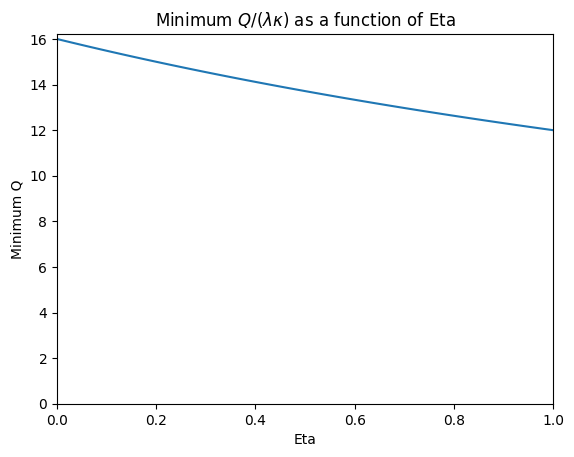

In [13]:
# Calculate the minimum Q value for each eta
min_Qs = [np.min(Q) for Q in all_Qs]

# Plot min_Qs as a function of eta_values
plt.plot(eta_values, min_Qs)

# Set the x-axis limits to end at 1
plt.xlim(0, 1)

# Set the y-axis limits to start from zero
plt.ylim(0)

# Add labels to the plot
plt.xlabel('Eta')
plt.ylabel('Minimum Q')
plt.title('Minimum $Q/(\lambda \kappa)$ as a function of Eta')

plt.show()

In [10]:
min_Qs

[16.002014220984076,
 15.948857942480966,
 15.896053563793497,
 15.84359760287127,
 15.79148662344177,
 15.739717234260711,
 15.688286088377088,
 15.637189882412526,
 15.586425355854704,
 15.535989290364427,
 15.485878509096155,
 15.43608987603153,
 15.386620295325837,
 15.337466710666842,
 15.28862610464596,
 15.240095498141331,
 15.191871949712652,
 15.143952555007363,
 15.096334446178133,
 15.049014791311182,
 15.001990793865403,
 14.955259692121867,
 14.908818758643662,
 14.862665299745673,
 14.81679665497425,
 14.77121019659637,
 14.725903329098307,
 14.6808734886934,
 14.636118142838848,
 14.591634789761331,
 14.54742095799118,
 14.503474205905071,
 14.459792121276896,
 14.416372320836762,
 14.373212449837883,
 14.330310181631244,
 14.287663217247816,
 14.245269284988249,
 14.203126140019794,
 14.161231563980373,
 14.11958336458965,
 14.078179375266888,
 14.037017454755555,
 13.996095486754447,
 13.955411379555281,
 13.914963065686546,
 13.874748501563548,
 13.834765667144486,
 1